In [398]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import acquire
import prepare
import os
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)

from math import sqrt
from scipy import stats

import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer

np.random.seed(123)

In [488]:
df = acquire.get_competition_data()

In [489]:
df = prepare.prepare_competition_data(df)

In [490]:
df['event_score'] = df.event_score.astype(float)

In [491]:
df = df.drop(columns=['last_name', 'short_best', 'short_place', 'short_elements_rank', 'short_components_rank', 'short_overall', 'free_elements_rank', 'free_components_rank', 'free_overall', 'olympian',  'free_place', 'free_best', 'event_best', 'first_name', 'short_combo_jump', 'short_solo_jump', 'short_axel_jump', 'free_elements'])

In [492]:
df = df.drop(columns=['country_flag'])

In [467]:
df

event_final_place  short_score  free_score  event_score  \
0                     1        66.02      125.32       191.34   
1                     2        66.73      116.63       183.36   
2                     3        66.70      114.74       181.44   
3                     4        61.75      113.48       175.23   
4                     5        55.85      111.42       167.27   
5                     6        59.40      106.31       165.71   
6                     7        57.08      103.79       160.87   
7                     8        55.57      100.56       156.13   
8                     9        53.77       99.73       153.50   
9                    10        57.90       93.56       151.46   
10                   11        49.84       95.46       145.30   
11                   12        50.61       94.55       145.16   
12                   13        53.74       89.48       143.22   
13                   14        46.69       95.66       142.35   
14                   15        56.00       84.20       140.20   
15                   16        44.84       92.36       137.20   
16                   17        52.35       81.73       134.08   
17                   18        49.58       79.68       129.26   
18                   19        47.06       80.01       127.07   
19                   20        41.25       84.12       125.37   
20                   21        44.20       79.44       123.64   
21                   22        42.47       77.90       120.37   
22                   23        46.40       73.45       119.85   
23                   24        44.53       65.04       109.57   
24                    1        78.50      150.06       228.56   
25                    2        73.78      131.72       205.50   
26                    3        71.36      131.28       202.64   
27                    4        63.76      126.39       190.15   
28                    5        64.76      124.10       188.86   
29                    6        61.36      126.61       187.97   
30                    7        64.64      117.85       182.49   
31                    8        61.02      120.42       181.44   
32                    9        62.14      110.32       172.46   
33                   10        59.22      112.69       171.91   
34                   11        52.96      108.61       161.57   
35                   12        57.16       99.46       156.62   
36                   13        53.16      102.37       155.53   
37                   14        61.92       93.32       155.24   
38                   15        56.70       96.11       152.81   
39                   16        63.02       88.88       151.90   
40                   17        57.46       93.80       151.26   
41                   18        49.04       94.90       143.94   
42                   19        51.74       91.73       143.47   
43                   20        52.16       86.00       138.16   
44                   21        50.80       83.39       134.19   
45                   22        49.74       83.77       133.51   
46                   23        49.02       82.63       131.65   
47                   24        50.74       78.80       129.54   
48                    1        74.64      149.95       224.59   
49                    2        74.92      144.19       219.11   
50                    2        74.92      144.19       219.11   
51                    2        74.92      144.19       219.11   
52                    2        74.92      144.19       219.11   
53                   16        54.37       95.11       149.48   
54                   16        54.37       95.11       149.48   
55                   16        54.37       95.11       149.48   
56                   16        54.37       95.11       149.48   
57                    3        74.12      142.61       216.73   
58                    4        68.63      136.90       205.53   
59                    5        65.23      135.34       200.57   
60                    6        55.51     

In [493]:
df2006 = pd.DataFrame(df[(df.season <= 2006)].where(df.event != 'olympics'))
o2006 = pd.DataFrame(df[df.season == 2006].where(df.event == 'olympics'))
df2010 = pd.DataFrame(df[(df.season <= 2010) & (df.season > 2006)].where(df.event != 'olympics'))
o2010 = pd.DataFrame(df[df.season == 2010].where(df.event == 'olympics'))
df2014 = pd.DataFrame(df[(df.season <= 2014) & (df.season > 2010)].where(df.event != 'olympics'))
o2014 = pd.DataFrame(df[df.season == 2014].where(df.event == 'olympics'))
df2018 = pd.DataFrame(df[(df.season <= 2018) & (df.season > 2014)].where(df.event != 'olympics'))
o2018 = pd.DataFrame(df[df.season == 2018].where(df.event == 'olympics'))
df2022 = pd.DataFrame(df[(df.season <= 2022) & (df.season > 2018)].where(df.event != 'olympics'))
o2022 = pd.DataFrame(df[df.season == 2022].where(df.event == 'olympics'))

In [494]:
df2006 = df2006.dropna()
o2006 = o2006.dropna()
df2010 = df2010.dropna()
o2010 = o2010.dropna()
df2014 = df2014.dropna()
o2014 = o2014.dropna()
df2018 = df2018.dropna()
o2018 = o2018.dropna()
df2022 = df2022.dropna()
o2022 = o2022.dropna()

In [495]:
o2006 = o2006[['skater_name', 'country', 'event_final_place', 'short_score', 'short_elements_score', 'short_components_score', 'free_elements_score', 'free_components_score', 'free_score', 'event_score', 'season']]
o2010 = o2010[['skater_name', 'country', 'event_final_place', 'short_score', 'short_elements_score', 'short_components_score', 'free_elements_score', 'free_components_score', 'free_score', 'event_score', 'season']]
o2014 = o2014[['skater_name', 'country', 'event_final_place', 'short_score', 'short_elements_score', 'short_components_score', 'free_elements_score', 'free_components_score', 'free_score', 'event_score', 'season']]
o2018 = o2018[['skater_name', 'country', 'event_final_place', 'short_score', 'short_elements_score', 'short_components_score', 'free_elements_score', 'free_components_score', 'free_score', 'event_score', 'season']]
o2022 = o2022[['skater_name', 'country', 'event_final_place', 'short_score', 'short_elements_score', 'short_components_score', 'free_elements_score', 'free_components_score', 'free_score', 'event_score', 'season']]

In [496]:
o2006 = o2006.rename(columns={'event_final_place': 'oly_event_final_place', 'short_score': 'oly_short_score', 'short_elements_score': 'oly_short_elements_score', 'short_components_score': 'oly_short_components_score', 'free_elements_score': 'oly_free_elements_score', 'free_components_score': 'oly_free_components_score', 'free_score': 'oly_free_score', 'event_score':'oly_event_score'})
o2010 = o2010.rename(columns={'event_final_place': 'oly_event_final_place', 'short_score': 'oly_short_score', 'short_elements_score': 'oly_short_elements_score', 'short_components_score': 'oly_short_components_score', 'free_elements_score': 'oly_free_elements_score', 'free_components_score': 'oly_free_components_score', 'free_score': 'oly_free_score', 'event_score':'oly_event_score'})
o2014 = o2014.rename(columns={'event_final_place': 'oly_event_final_place', 'short_score': 'oly_short_score', 'short_elements_score': 'oly_short_elements_score', 'short_components_score': 'oly_short_components_score', 'free_elements_score': 'oly_free_elements_score', 'free_components_score': 'oly_free_components_score', 'free_score': 'oly_free_score', 'event_score':'oly_event_score'})
o2018 = o2018.rename(columns={'event_final_place': 'oly_event_final_place', 'short_score': 'oly_short_score', 'short_elements_score': 'oly_short_elements_score', 'short_components_score': 'oly_short_components_score', 'free_elements_score': 'oly_free_elements_score', 'free_components_score': 'oly_free_components_score', 'free_score': 'oly_free_score', 'event_score':'oly_event_score'})
o2022 = o2022.rename(columns={'event_final_place': 'oly_event_final_place', 'short_score': 'oly_short_score', 'short_elements_score': 'oly_short_elements_score', 'short_components_score': 'oly_short_components_score', 'free_elements_score': 'oly_free_elements_score', 'free_components_score': 'oly_free_components_score', 'free_score': 'oly_free_score', 'event_score':'oly_event_score'})

In [449]:
df2006 = df2006.groupby(df2006.skater_name).mean()
df2010 = df2010.groupby(df2010.skater_name).mean()
df2014 = df2014.groupby(df2014.skater_name).mean()
df2018 = df2018.groupby(df2018.skater_name).mean()
df2022 = df2022.groupby(df2022.skater_name).mean()

In [300]:
# df2006.columns = df2006.columns.get_level_values(0) + '_' +  df2006.columns.get_level_values(1)
# df2010.columns = df2010.columns.get_level_values(0) + '_' +  df2010.columns.get_level_values(1)
# df2014.columns = df2014.columns.get_level_values(0) + '_' +  df2014.columns.get_level_values(1)
# df2018.columns = df2018.columns.get_level_values(0) + '_' +  df2018.columns.get_level_values(1)
# df2022.columns = df2022.columns.get_level_values(0) + '_' +  df2022.columns.get_level_values(1)

IndexError: Too many levels: Index has only 1 level, not 2

In [450]:
df06 = df2006.merge(o2006, on='skater_name')
df10 = df2010.merge(o2010, on='skater_name')
df14 = df2014.merge(o2014, on='skater_name')
df18 = df2018.merge(o2018, on='skater_name')
df22 = df2022.merge(o2022, on='skater_name')

In [451]:
df = pd.concat([df06, df10, df14, df18, df22], axis=0)

In [497]:
df = pd.concat([o2006, o2010, o2014, o2018, o2022], axis=0)

In [498]:
df = df.reset_index()

In [377]:
train, test = train_test_split(df, test_size=.2, random_state=123)
train, validate = train_test_split(train, test_size=.3, random_state=123)

In [378]:
train

skater_name  event_final_place  short_score  free_score  \
9           Kanako Murakami           4.333333    57.075833  109.609167   
2   Anastasia Gimazetdinova          14.375000    44.886250   72.533750   
15                 Yuna Kim           1.666667    65.393333  135.806667   
10           Kaori Sakamoto           3.444444    72.156667  141.921111   
19             Xiangning Li          11.400000    56.576000  110.394000   
0         Adelina Sotnikova           4.000000    60.201250  111.102500   
19           Wakaba Higuchi           4.428571    67.418571  126.694286   
15              Mariah Bell           5.222222    66.750000  133.706667   
9               Kiira Korpi           7.500000    52.908750   93.730000   
12       Maé-Bérénice Méité           7.700000    52.424000  100.148000   
21                Young You           4.000000    66.816000  135.504000   
16            Nicole Schott          11.833333    59.181667  112.290000   
13           Maria Sotskova           3.428571    68.865714  131.820000   
12                Miki Ando           2.538462    61.586154  110.374615   
5        Ekaterina Kurakova           9.000000    58.895000  123.225000   
19                 Zijun Li           6.500000    57.180000  107.070000   
11               Karen Chen           5.777778    70.264444  123.980000   
14            Rachael Flatt           3.400000    57.548000  107.816000   
13             Mirai Nagasu           5.500000    56.275000   88.557500   
4         Anna Shcherbakova           1.200000    75.664000  155.852000   
1         Alexandra Trusova           2.166667    72.230000  153.965000   
13             Mirai Nagasu           5.500000    56.275000   88.557500   
11                Mao Asada           2.176471    63.455294  115.700588   
7          Eliska Brezinova          20.000000    58.103333   95.806667   
10           Kaori Sakamoto           3.500000    69.140000  133.155000   
1            Bradie Tennell           3.000000    67.010000  137.090000   
14       Maé-Bérénice Méité           9.285714    56.610000  107.482857   
14            Rachael Flatt           3.400000    57.548000  107.816000   
6      Elene Gedevanishvili          10.555556    49.540000   89.245556   
7          Joannie Rochette           3.571429    58.002857  112.480000   
17          Tugba Karademir          13.142857    43.972857   75.865714   
6      Elene Gedevanishvili          10.555556    49.540000   89.245556   
3              Brooklee Han          21.000000    50.620000   91.260000   
7          Joannie Rochette           3.571429    58.002857  112.480000   
14        Valentina Marchei           8.300000    51.875000   97.230000   
10            Laura Lepistö           5.250000    55.731250   99.216250   
18                  Yan Liu          11.000000    44.812000   80.415000   
13       Nathalie Weinzierl          19.000000    48.140000   94.340000   
9            Kailani Craine          17.000000    55.965000   92.020000   
7                Ivett Tóth          20.000000    61.000000   99.770000   
17          Tugba Karademir          13.142857    43.972857   75.865714   
15             Sarah Hecken           8.500000    44.680000   83.070000   
9               Kiira Korpi           7.500000    52.908750   93.730000   
18          Satoko Miyahara           2.846154    67.424615  132.016923   
8            Kaetlyn Osmond           4.500000    62.645000  113.990000   
3          Carolina Kostner           4.916667    58.276667  102.952500   
17            Olga Mikutina          10.000000    62.135000  117.795000   
4          Carolina Kostner           2.230769    62.170769  117.653077   
11                Mao Asada           2.176471    63.455294  115.700588   
12          Loena Hendrickx          15.000000    57.540000  115.280000   
5      Elene Gedevanishvili           8.363636    52.285455   95.020909   
7         Julia Lipnitskaia           1.800000    66.472000  121.194000   
4     Elizabet Tursynbayeva           7.2

### Distributions of features
- where it makes sense (ie. do not need distribution of skater placement as there will clearly be a place assigned to each skater based on results)

<AxesSubplot:title={'center':'Feature Correlation (contiuous variables) to event score'}>

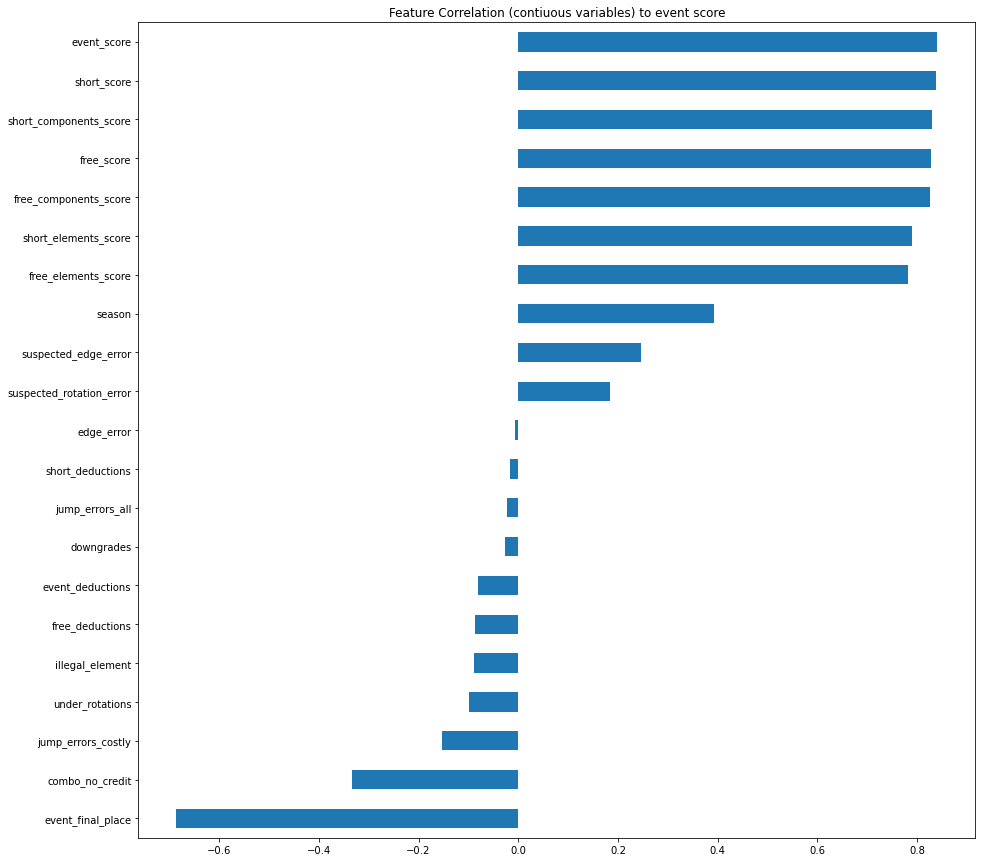

In [379]:
plt.figure(figsize=(15, 15))
# sets the size of the graph
plt.title("Feature Correlation (contiuous variables) to event score")
corr_chart = train.drop(['oly_event_final_place', 'oly_short_score', 'oly_short_elements_score', 'oly_short_components_score', 'oly_free_elements_score', 'oly_free_components_score', 'oly_free_score', 'oly_event_score'], axis=1).corrwith(train['oly_event_score']).sort_values().plot.barh()
corr_chart

In [380]:
X_train = train.drop(columns=['oly_event_final_place', 'oly_short_score', 'oly_short_elements_score', 'oly_short_components_score', 
                      'oly_free_elements_score', 'oly_free_components_score', 'oly_free_score'])

In [452]:
df = df.reset_index()

In [499]:
df.season.value_counts()

2014.0    29
2006.0    24
2010.0    24
2018.0    24
2022.0    23
Name: season, dtype: int64

In [454]:
olympic_results = df[['skater_name', 'oly_event_final_place', 'oly_short_score', 'oly_short_elements_score', 'oly_short_components_score', 
                      'oly_free_elements_score', 'oly_free_components_score', 'oly_free_score', 'season']]

skater_name  oly_event_final_place  oly_short_score  \
0               Akiko Suzuki                    8.0            61.02   
1              Alena Leonova                    9.0            62.14   
2    Anastasia Gimazetdinova                   23.0            49.02   
3           Carolina Kostner                   16.0            63.02   
4            Cynthia Phaneuf                   12.0            57.16   
5              Elena Glebova                   21.0            50.80   
6       Elene Gedevanishvili                   14.0            61.92   
7           Joannie Rochette                    3.0            71.36   
8            Julia Sebestyen                   17.0            57.46   
9                Kiira Korpi                   11.0            52.96   
10             Laura Lepistö                    6.0            61.36   
11                 Mao Asada                    2.0            73.78   
12                 Miki Ando                    5.0            64.76   
13              Mirai Nagasu                    4.0            63.76   
14             Rachael Flatt                    7.0            64.64   
15              Sarah Hecken                   18.0            49.04   
16               Sarah Meier                   15.0            56.70   
17           Tugba Karademir                   24.0            50.74   
18                   Yan Liu                   19.0            51.74   
19                  Yuna Kim                    1.0            78.50   
20              Akiko Suzuki                    8.0            61.02   
21             Alena Leonova                    9.0            62.14   
22   Anastasia Gimazetdinova                   23.0            49.02   
23          Carolina Kostner                   16.0            63.02   
24           Cynthia Phaneuf                   12.0            57.16   
25             Elena Glebova                   21.0            50.80   
26      Elene Gedevanishvili                   14.0            61.92   
27          Joannie Rochette                    3.0            71.36   
28           Julia Sebestyen                   17.0            57.46   
29               Kiira Korpi                   11.0            52.96   
30             Laura Lepistö                    6.0            61.36   
31                 Mao Asada                    2.0            73.78   
32                 Miki Ando                    5.0            64.76   
33              Mirai Nagasu                    4.0            63.76   
34             Rachael Flatt                    7.0            64.64   
35              Sarah Hecken                   18.0            49.04   
36               Sarah Meier                   15.0            56.70   
37           Tugba Karademir                   24.0            50.74   
38                   Yan Liu                   19.0            51.74   
39                  Yuna Kim                    1.0            78.50   
40         Adelina Sotnikova                    1.0            74.64   
41              Akiko Suzuki                    8.0            60.97   
42             Ashley Wagner                    7.0            65.21   
43              Brooklee Han                   20.0            49.32   
44          Carolina Kostner                    3.0            74.12   
45      Elene Gedevanishvili                   19.0            54.70   
46               Gracie Gold                    4.0            68.63   
47         Julia Lipnitskaia                    5.0            65.23   
48            Kaetlyn Osmond                   13.0            56.18   
49           Kanako Murakami                   12.0            55.60   
50               Kexin Zhang                   15.0            55.80   
51                 Mao Asada                    6.0            55.51   
52        Maé-Bérénice Méité                   10.0            58.63   
53        Nathalie Weinzierl                   18.0            57.63   
54         Valentina Marchei                   11.0      

2022.000000    6
2018.000000    6
2012.333333    4
2017.000000    3
2009.750000    2
2008.000000    2
2017.400000    2
2009.666667    2
2013.500000    2
2013.600000    2
2014.000000    2
2013.250000    2
2008.857143    2
2008.300000    2
2008.285714    2
2021.000000    2
2010.000000    2
2008.250000    2
2008.375000    2
2008.750000    2
2009.333333    2
2008.875000    2
2008.777778    2
2009.600000    2
2008.181818    2
2008.642857    2
2008.615385    2
2009.125000    2
2009.500000    2
2008.235294    2
2020.222222    1
2020.833333    1
2019.400000    1
2020.800000    1
2021.166667    1
2020.333333    1
2020.555556    1
2020.500000    1
2020.428571    1
2017.600000    1
2021.444444    1
2020.750000    1
2021.666667    1
2021.500000    1
2012.600000    1
2016.615385    1
2017.500000    1
2016.625000    1
2016.285714    1
2017.571429    1
2017.142857    1
2016.545455    1
2017.125000    1
2012.700000    1
2012.642857    1
2012.500000    1
2012.363636    1
2012.230769    1
2012.833333   

In [524]:
df['season'] = df['season'].astype(int)

In [534]:
df[(df['season'] == 2014)].sort_values(by='oly_free_components_score', ascending=False)

index           skater_name         country  oly_event_final_place  \
49     49              Yuna Kim     south_korea                    2.0   
51     51              Yuna Kim     south_korea                    2.0   
53     53            Haejin Kim     south_korea                   16.0   
55     55            Haejin Kim     south_korea                   16.0   
48     48     Adelina Sotnikova          russia                    1.0   
57     57      Carolina Kostner           italy                    3.0   
59     59     Julia Lipnitskaia          russia                    5.0   
60     60             Mao Asada           japan                    6.0   
58     58           Gracie Gold             usa                    4.0   
61     61         Ashley Wagner             usa                    7.0   
62     62          Akiko Suzuki           japan                    8.0   
65     65     Valentina Marchei           italy                   11.0   
63     63        Polina Edmunds             usa                    9.0   
66     66       Kanako Murakami           japan                   12.0   
67     67        Kaetlyn Osmond          canada                   13.0   
64     64    Maé-Bérénice Méité          france                   10.0   
68     68              Zijun Li           china                   14.0   
72     72  Elene Gedevanishvili         georgia                   19.0   
71     71    Nathalie Weinzierl         germany                   18.0   
54     54            Haejin Kim     south_korea                   16.0   
56     56            Haejin Kim     south_korea                   16.0   
50     50              Yuna Kim     south_korea                    2.0   
52     52              Yuna Kim     south_korea                    2.0   
69     69           Kexin Zhang           china                   15.0   
70     70     Gabrielle Daleman          canada                   17.0   
73     73          Brooklee Han       australia                   20.0   
74     74           Soyoun Park     south_korea                   21.0   
76     76       Nicole Rajicova        slovakia                   24.0   
75     75     Elizaveta Ukolova  czech_republic                   22.0   

    oly_short_score  oly_short_elements_score  oly_short_components_score  \
49            74.92                     39.03                       35.89   
51            74.92                     29.23                       25.14   
53            54.37                     39.03                       35.89   
55            54.37                     29.23                       25.14   
48            74.64                     39.09                       35.55   
57            74.12                     37.49                       36.63   
59            65.23                     33.15                       33.08   
60            55.51                     22.63                       33.88   
58            68.63                     36.55                       32.08   
61            65.21                     31.43                       33.78   
62            60.97                     28.71                       32.26   
65            57.02                     27.52                       29.50   
63            61.04                     32.98                       28.06   
66            55.60                     26.72                       28.88   
67            56.18                     27.51                       28.67   
64            58.63                     30.83                       27.80   
68            57.55                     30.01                       27.54   
72            54.70                     27.51                       27.19   
71            57.63                     31.94                       25.69   
54            54.37                     39.03                       35.89   
56            54.37                     29.23                       25.14   
50            74.92                     39.03                       35.89   
52          

ValueError: Boolean array expected for the condition, not object

In [385]:
def map_score(country):
  if country == 'usa':
    return "usa"
  elif (country == 'canada') | (country == 'russia') | (country == 'japan') | (country == 'south_korea') | (country == 'italy'):
    return 'top'
  else:
    return 'other'

train["top"] = train["country"].apply(lambda country: map_score(country))

/var/folders/s4/hmz6ljm533vgpm_bhv59yw0m0000gn/T/ipykernel_81771/3573017000.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X1 = X_train.select_dtypes([np.int, np.float])
/var/folders/s4/hmz6ljm533vgpm_bhv59yw0m0000gn/T/ipykernel_81771/3573017000.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details 

<Figure size 432x288 with 0 Axes>

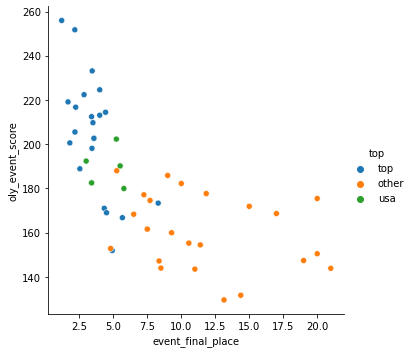

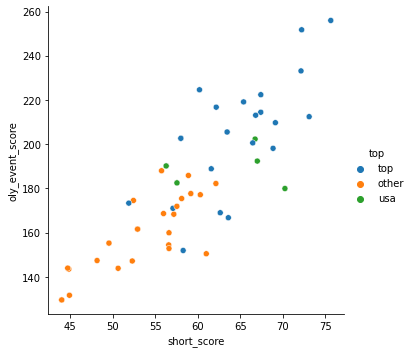

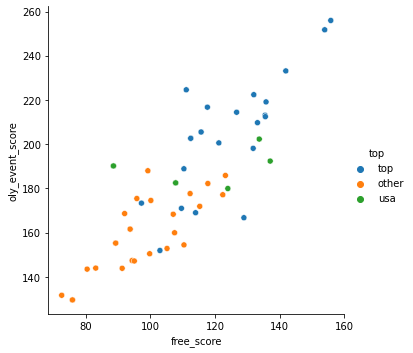

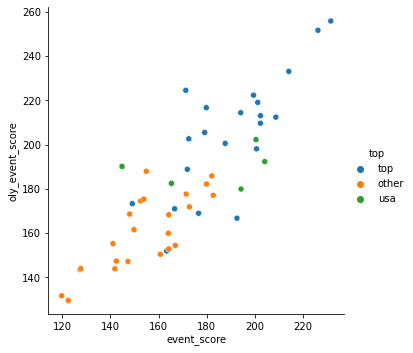

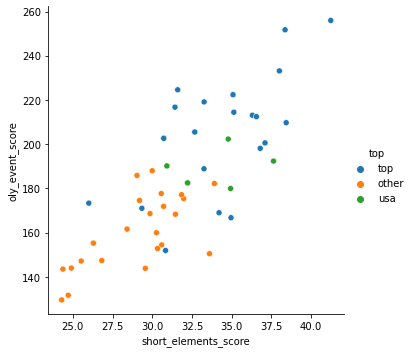

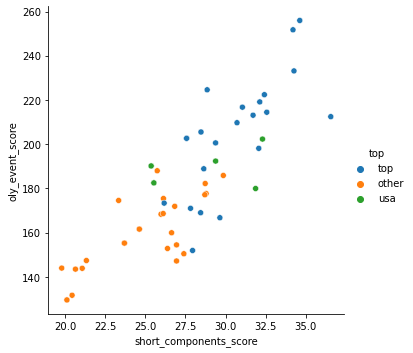

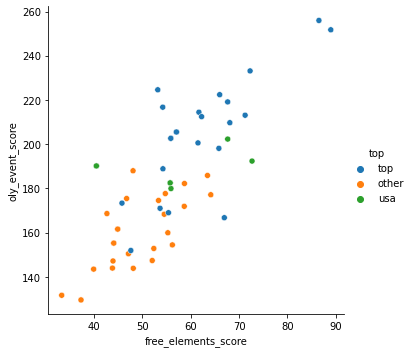

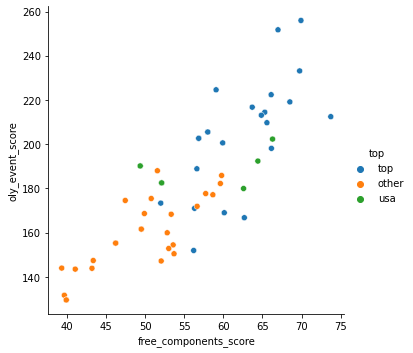

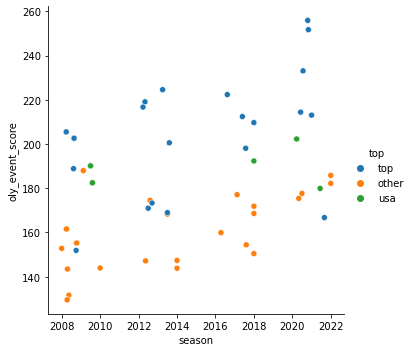

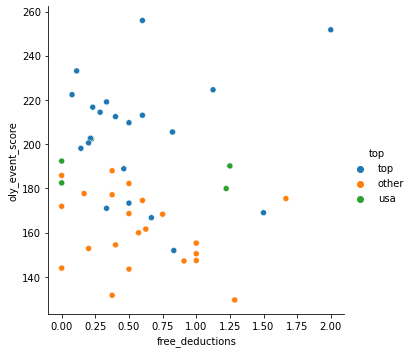

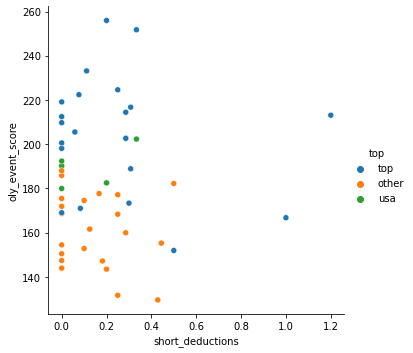

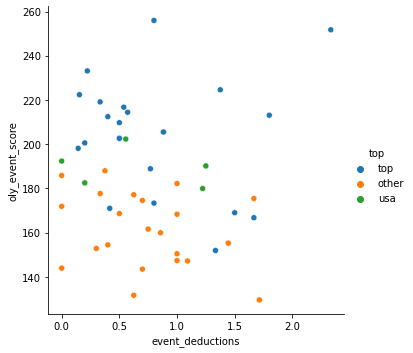

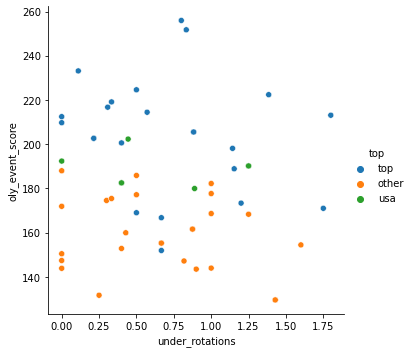

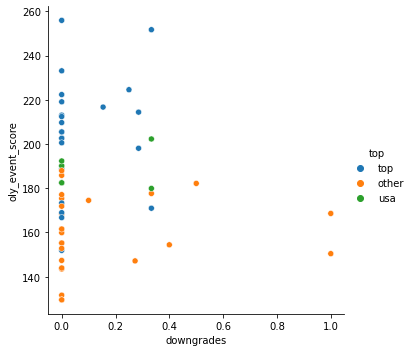

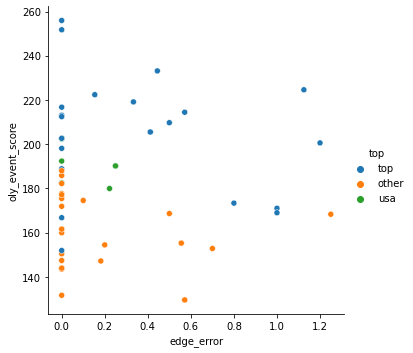

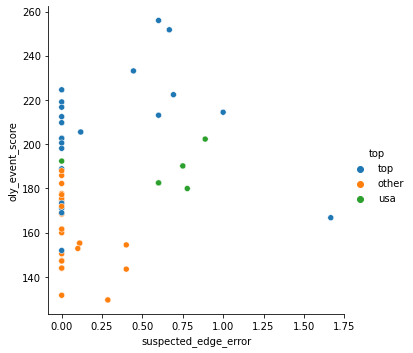

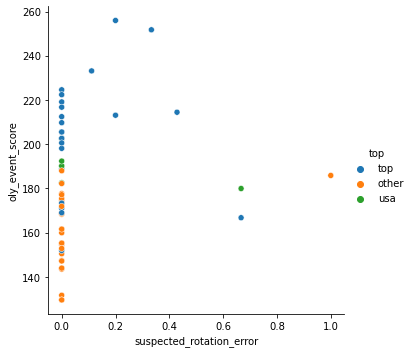

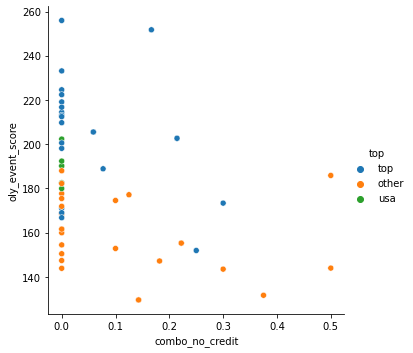

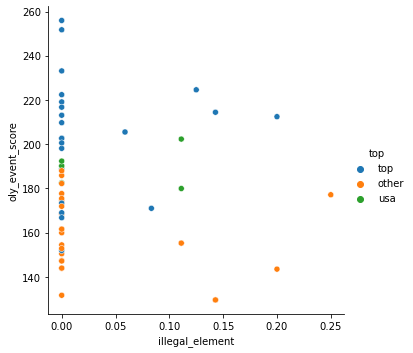

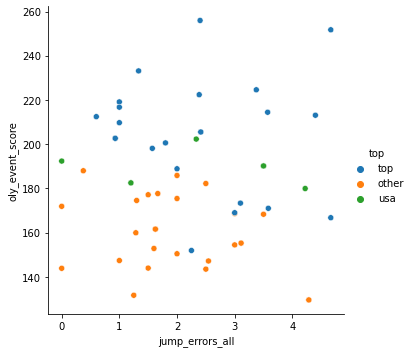

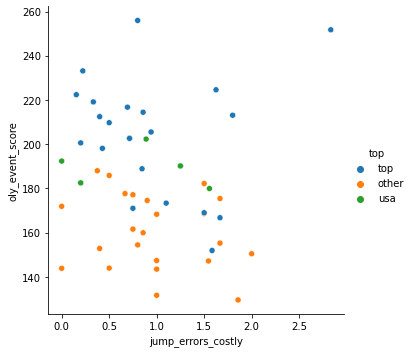

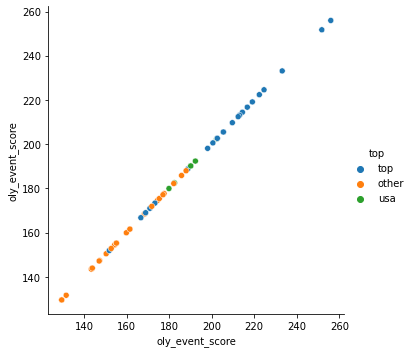

In [382]:
X1 = X_train.select_dtypes([np.int, np.float])
for i, col in enumerate(X1.columns):
    plt.figure(i)
    sns.relplot(x=col, y='oly_event_score', data=train, hue='top')

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


<Figure size 432x288 with 0 Axes>

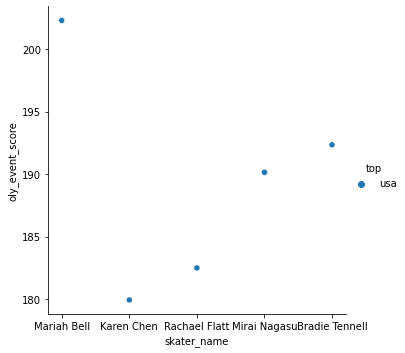

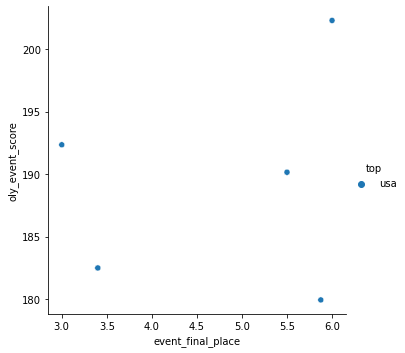

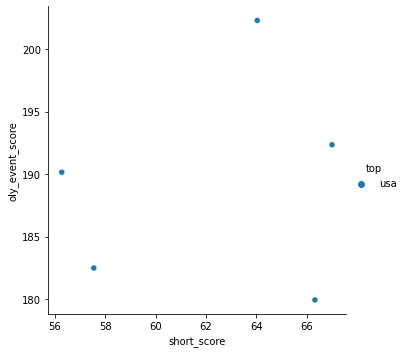

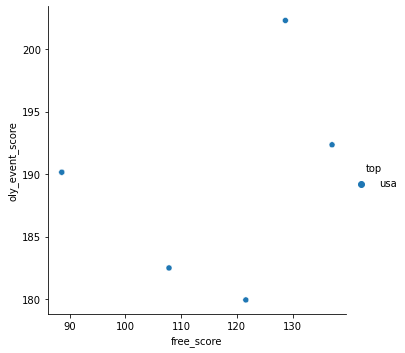

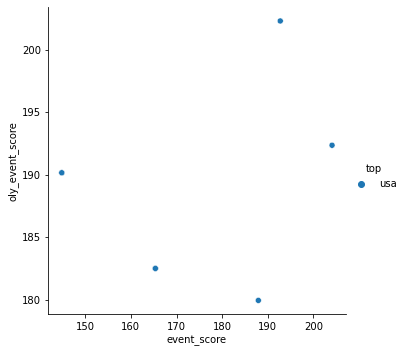

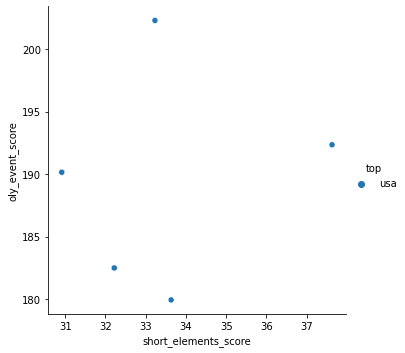

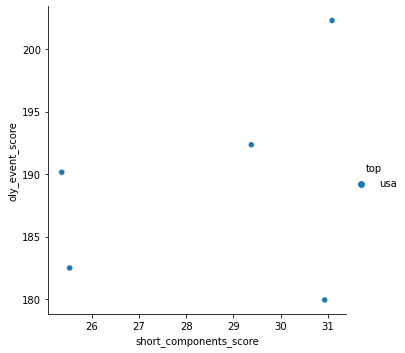

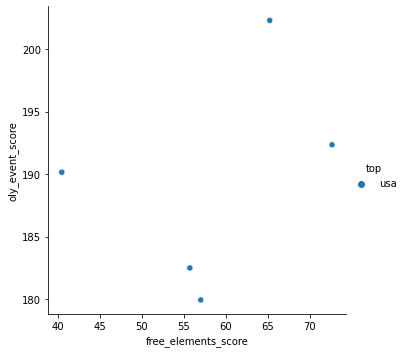

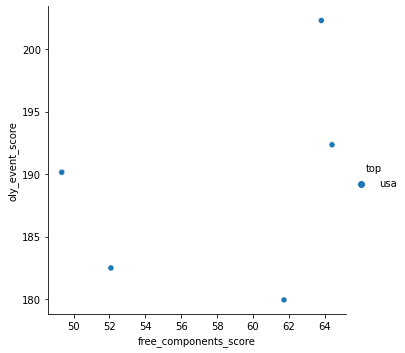

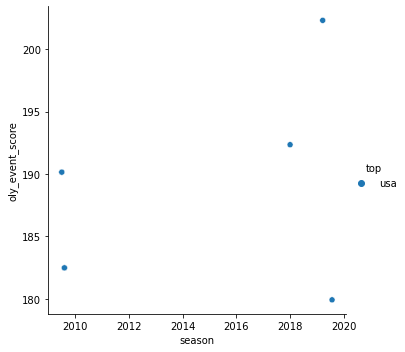

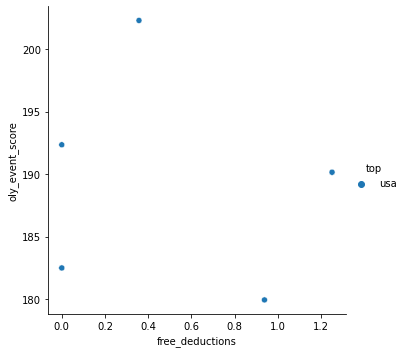

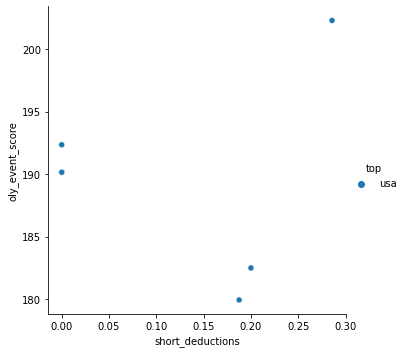

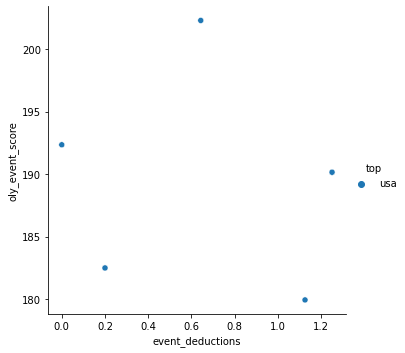

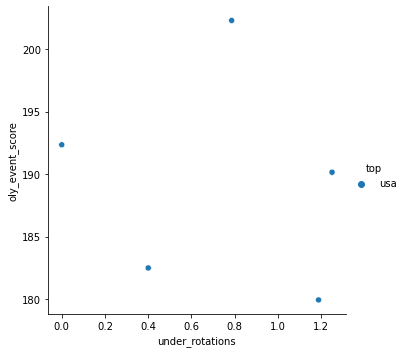

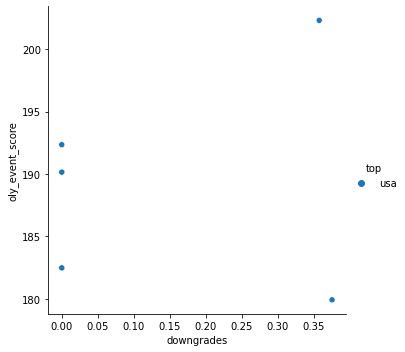

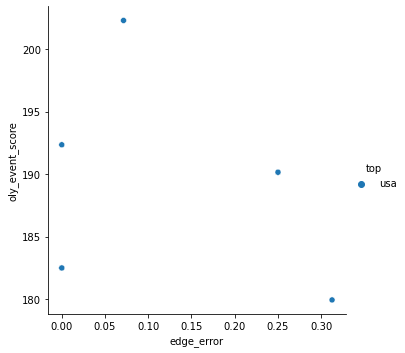

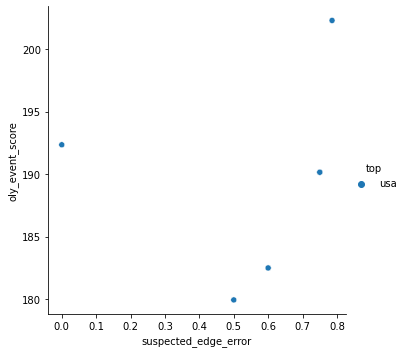

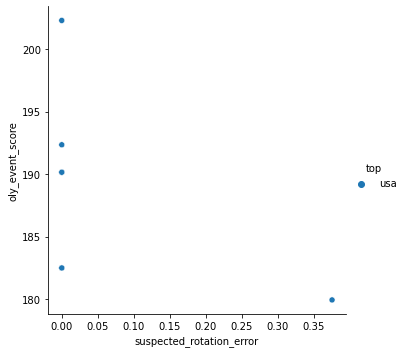

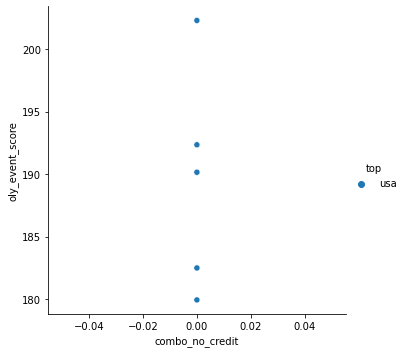

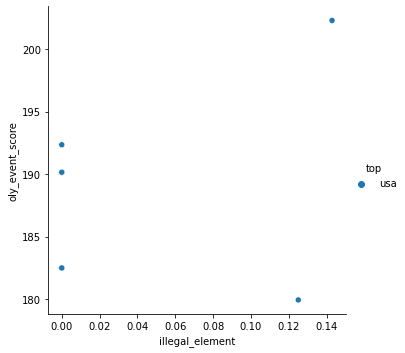

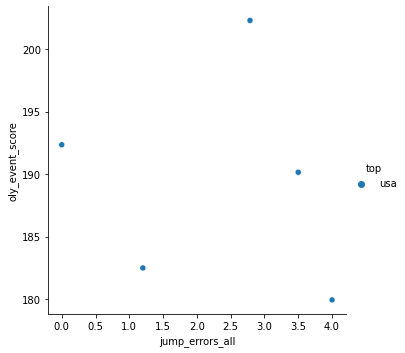

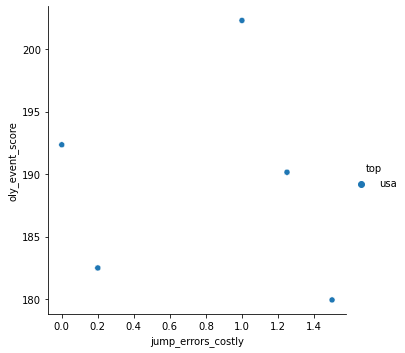

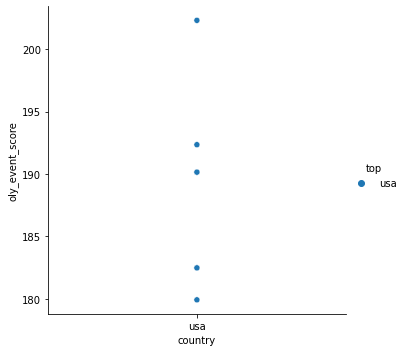

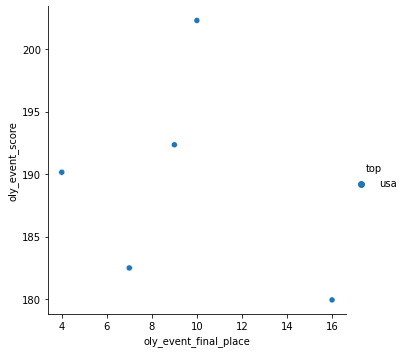

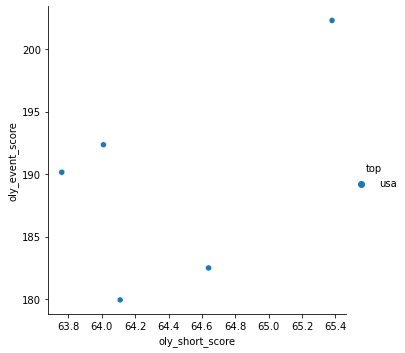

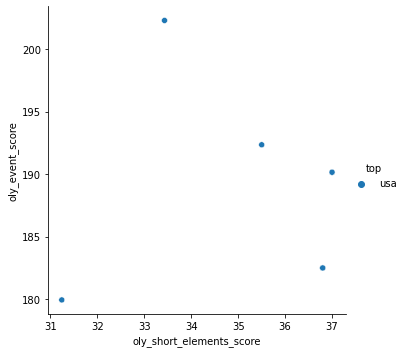

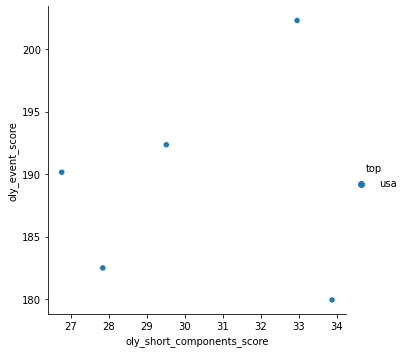

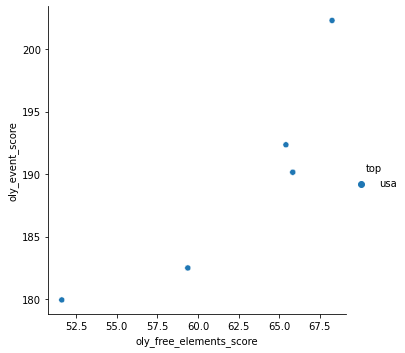

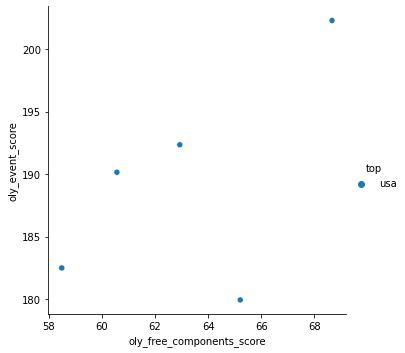

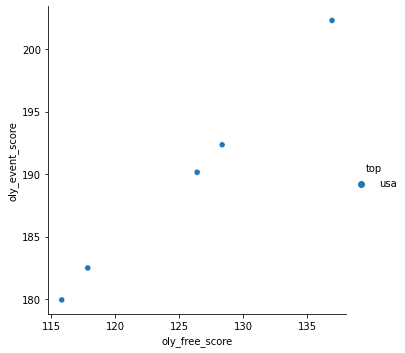

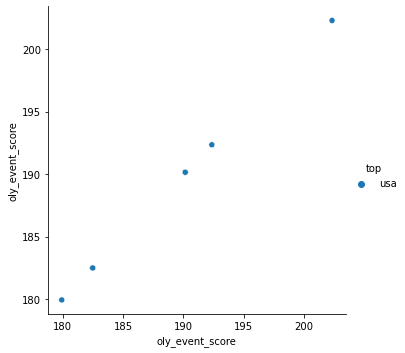

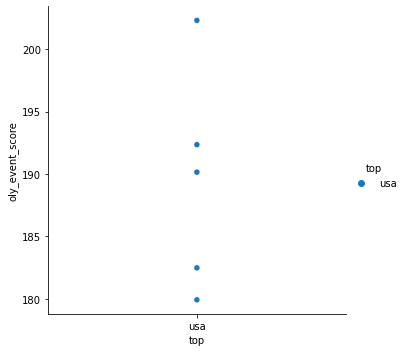

In [320]:
X1 = train.where(train.top == 'usa')
for i, col in enumerate(X1.columns):
    plt.figure(i)
    sns.relplot(x=col, y='oly_event_score', data=X1, hue='top')

In [401]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
 
# set colwidth hidher
pd.set_option('display.max_colwidth', 300)

In [384]:
train['top'] = train.top.replace({True: 'yes', False:'no'})

In [228]:
train

skater_name  event_final_place_min  event_final_place_mean  \
9           Kanako Murakami                    1.0                4.333333   
2   Anastasia Gimazetdinova                    7.0               13.300000   
15                 Yuna Kim                    1.0                1.625000   
10           Kaori Sakamoto                    1.0                3.454545   
19             Xiangning Li                    8.0               11.400000   
0         Adelina Sotnikova                    2.0                4.000000   
19           Wakaba Higuchi                    2.0                4.615385   
15              Mariah Bell                    1.0                6.000000   
9               Kiira Korpi                    2.0                7.500000   
12       Maé-Bérénice Méité                    5.0                7.700000   
21                Young You                    3.0                4.000000   
16            Nicole Schott                    7.0               13.000000   
13           Maria Sotskova                    2.0                3.428571   
12                Miki Ando                    1.0                2.952381   
5        Ekaterina Kurakova                    9.0                9.000000   
19                 Zijun Li                    4.0                6.500000   
11               Karen Chen                    4.0                5.875000   
14            Rachael Flatt                    2.0                3.400000   
13             Mirai Nagasu                    4.0                5.500000   
4         Anna Shcherbakova                    1.0                1.200000   
1         Alexandra Trusova                    1.0                2.166667   
13             Mirai Nagasu                    4.0                5.500000   
11                Mao Asada                    1.0                2.050000   
7          Eliska Brezinova                    9.0               16.333333   
10           Kaori Sakamoto                    2.0                3.500000   
1            Bradie Tennell                    3.0                3.000000   
14       Maé-Bérénice Méité                    5.0                8.352941   
14            Rachael Flatt                    2.0                3.400000   
6      Elene Gedevanishvili                    6.0               10.555556   
7          Joannie Rochette                    1.0                4.000000   
17          Tugba Karademir                    9.0               13.142857   
6      Elene Gedevanishvili                    6.0               10.555556   
3              Brooklee Han                   21.0               21.000000   
7          Joannie Rochette                    1.0                4.000000   
14        Valentina Marchei                    4.0                9.736842   
10            Laura Lepistö                    3.0                5.250000   
18                  Yan Liu                    4.0               10.588235   
13       Nathalie Weinzierl                   19.0               19.000000   
9            Kailani Craine                   10.0               17.000000   
7                Ivett Tóth                   20.0               20.000000   
17          Tugba Karademir                    9.0               13.142857   
15             Sarah Hecken                    8.0                8.500000   
9               Kiira Korpi                    2.0                7.500000   
18          Satoko Miyahara                    1.0                3.133333   
8            Kaetlyn Osmond                    1.0                4.500000   
3          Carolina Kostner                    1.0                5.000000   
17            Olga Mikutina                    8.0               10.000000   
4          Carolina Kostner                    1.0                3.909091   
11                Mao Asada                    1.0                2.050000   
12          Loena Hendrickx                   15.0               15.000000   
5      Elene Gedevanishvili           

In [254]:
train

skater_name  event_final_place_min  event_final_place_mean  \
9           Kanako Murakami                    1.0                4.333333   
2   Anastasia Gimazetdinova                    7.0               13.300000   
15                 Yuna Kim                    1.0                1.625000   
10           Kaori Sakamoto                    1.0                3.454545   
19             Xiangning Li                    8.0               11.400000   
0         Adelina Sotnikova                    2.0                4.000000   
19           Wakaba Higuchi                    2.0                4.615385   
15              Mariah Bell                    1.0                6.000000   
9               Kiira Korpi                    2.0                7.500000   
12       Maé-Bérénice Méité                    5.0                7.700000   
21                Young You                    3.0                4.000000   
16            Nicole Schott                    7.0               13.000000   
13           Maria Sotskova                    2.0                3.428571   
12                Miki Ando                    1.0                2.952381   
5        Ekaterina Kurakova                    9.0                9.000000   
19                 Zijun Li                    4.0                6.500000   
11               Karen Chen                    4.0                5.875000   
14            Rachael Flatt                    2.0                3.400000   
13             Mirai Nagasu                    4.0                5.500000   
4         Anna Shcherbakova                    1.0                1.200000   
1         Alexandra Trusova                    1.0                2.166667   
13             Mirai Nagasu                    4.0                5.500000   
11                Mao Asada                    1.0                2.050000   
7          Eliska Brezinova                    9.0               16.333333   
10           Kaori Sakamoto                    2.0                3.500000   
1            Bradie Tennell                    3.0                3.000000   
14       Maé-Bérénice Méité                    5.0                8.352941   
14            Rachael Flatt                    2.0                3.400000   
6      Elene Gedevanishvili                    6.0               10.555556   
7          Joannie Rochette                    1.0                4.000000   
17          Tugba Karademir                    9.0               13.142857   
6      Elene Gedevanishvili                    6.0               10.555556   
3              Brooklee Han                   21.0               21.000000   
7          Joannie Rochette                    1.0                4.000000   
14        Valentina Marchei                    4.0                9.736842   
10            Laura Lepistö                    3.0                5.250000   
18                  Yan Liu                    4.0               10.588235   
13       Nathalie Weinzierl                   19.0               19.000000   
9            Kailani Craine                   10.0               17.000000   
7                Ivett Tóth                   20.0               20.000000   
17          Tugba Karademir                    9.0               13.142857   
15             Sarah Hecken                    8.0                8.500000   
9               Kiira Korpi                    2.0                7.500000   
18          Satoko Miyahara                    1.0                3.133333   
8            Kaetlyn Osmond                    1.0                4.500000   
3          Carolina Kostner                    1.0                5.000000   
17            Olga Mikutina                    8.0               10.000000   
4          Carolina Kostner                    1.0                3.909091   
11                Mao Asada                    1.0                2.050000   
12          Loena Hendrickx                   15.0               15.000000   
5      Elene Gedevanishvili           

/var/folders/s4/hmz6ljm533vgpm_bhv59yw0m0000gn/T/ipykernel_81771/686462139.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X1 = X_train.select_dtypes([np.int, np.float])
/var/folders/s4/hmz6ljm533vgpm_bhv59yw0m0000gn/T/ipykernel_81771/686462139.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details an

AttributeError: 'Rectangle' object has no property 'bins'

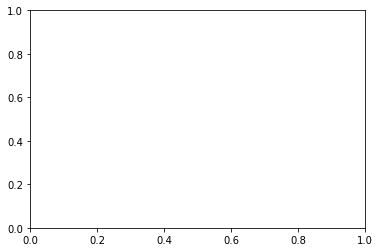

In [265]:
X1 = X_train.select_dtypes([np.int, np.float])
for i, col in enumerate(X1.columns):
    plt.figure(i)
    sns.barplot(x=col, y='oly_event_score', data=train, hue='top')

/var/folders/s4/hmz6ljm533vgpm_bhv59yw0m0000gn/T/ipykernel_81771/3628491184.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X1 = X_train.select_dtypes([np.int, np.float])
/var/folders/s4/hmz6ljm533vgpm_bhv59yw0m0000gn/T/ipykernel_81771/3628491184.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details 

<Figure size 432x288 with 0 Axes>

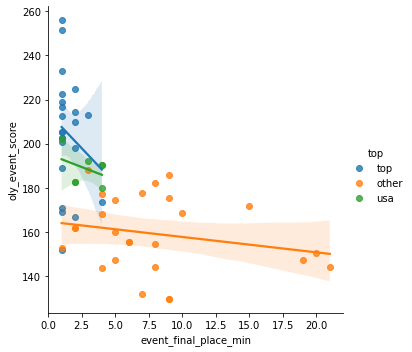

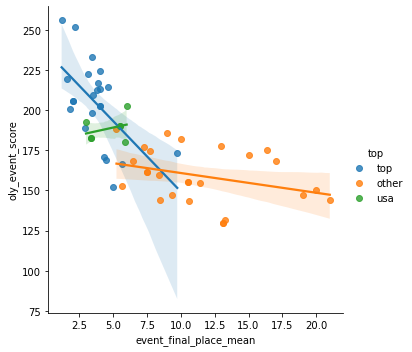

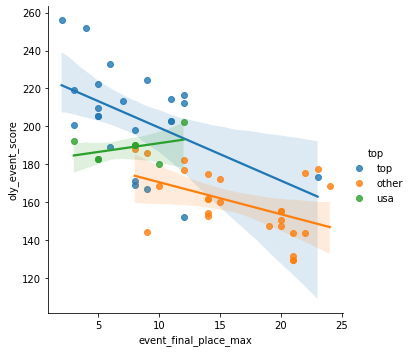

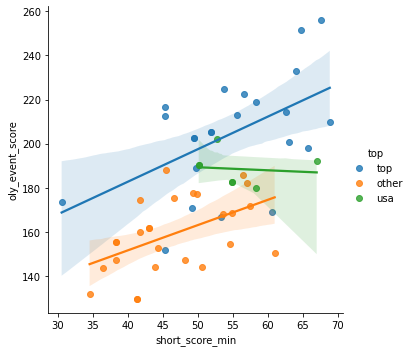

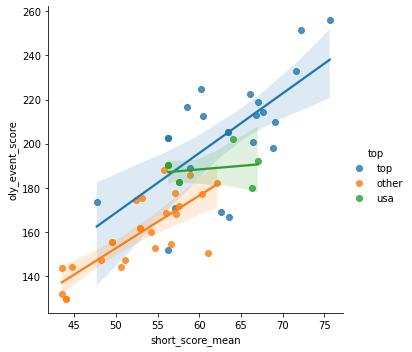

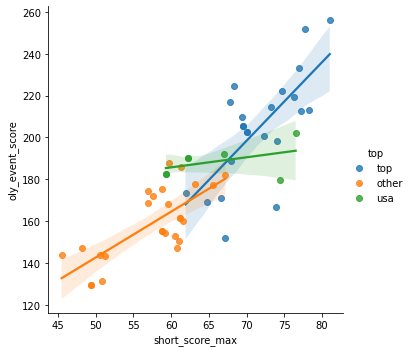

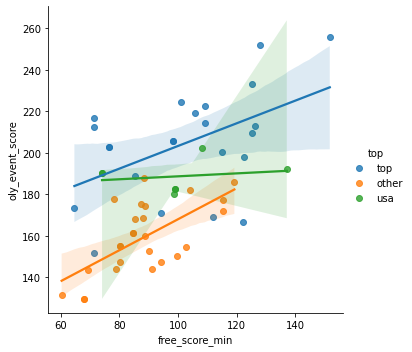

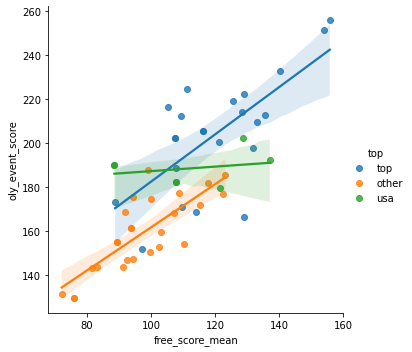

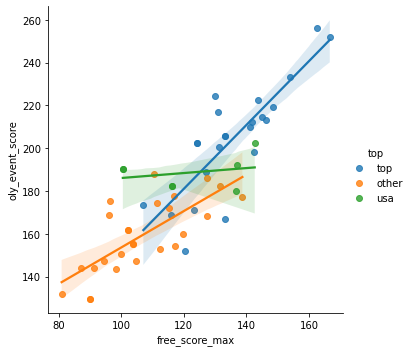

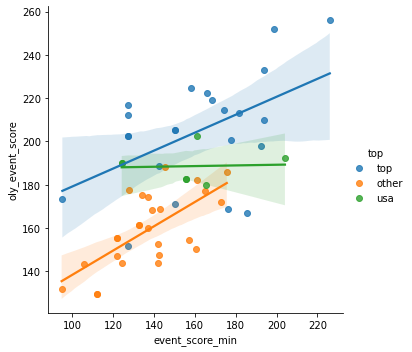

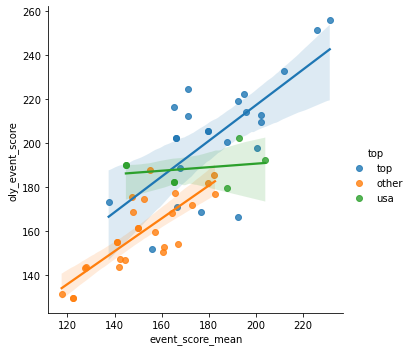

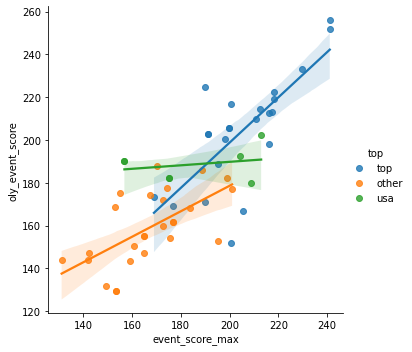

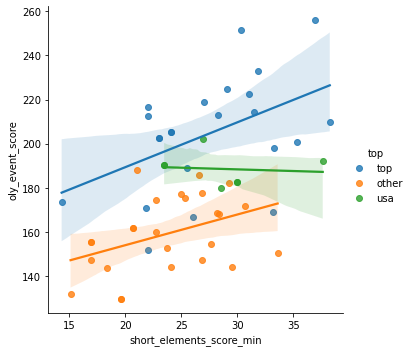

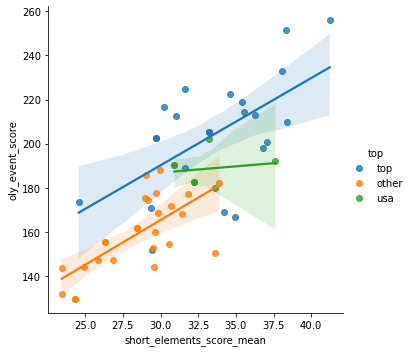

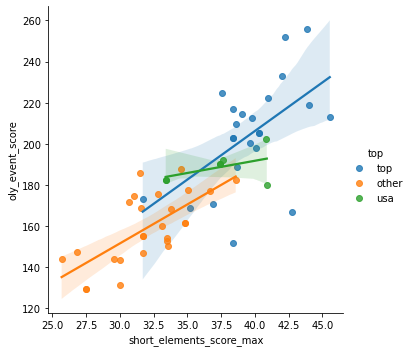

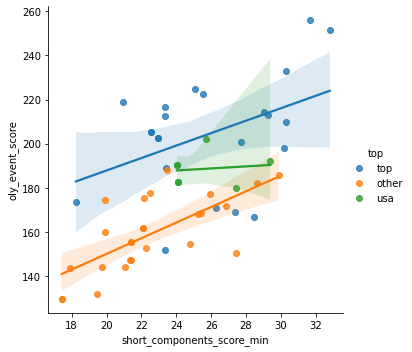

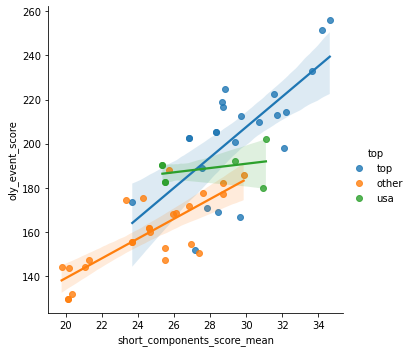

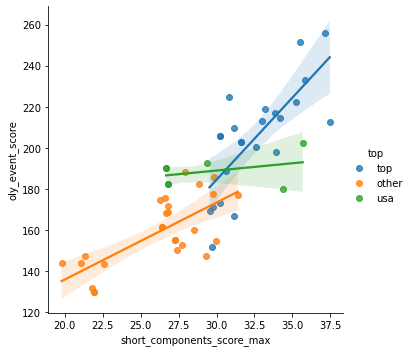

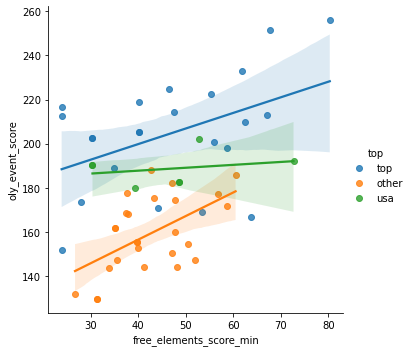

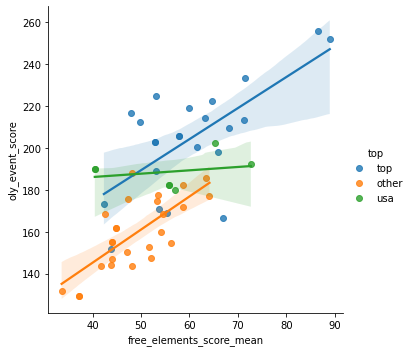

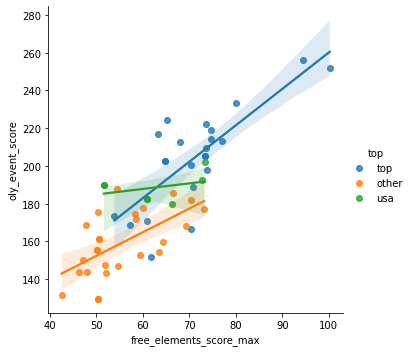

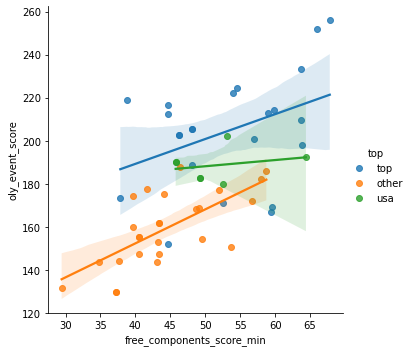

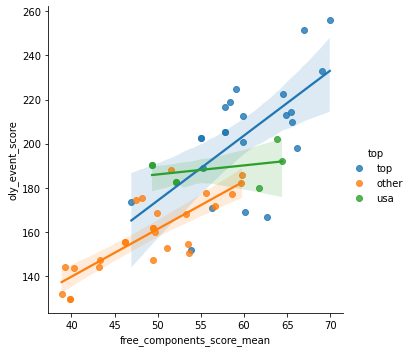

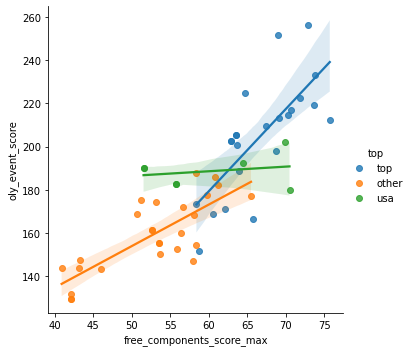

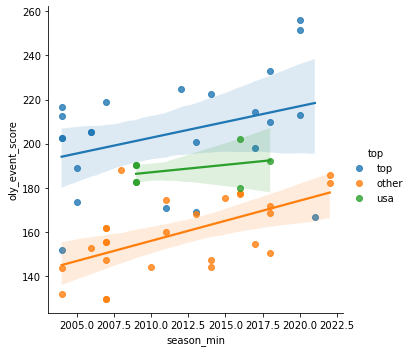

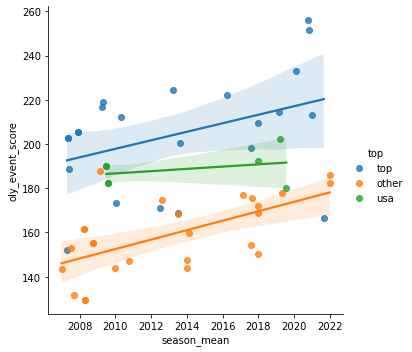

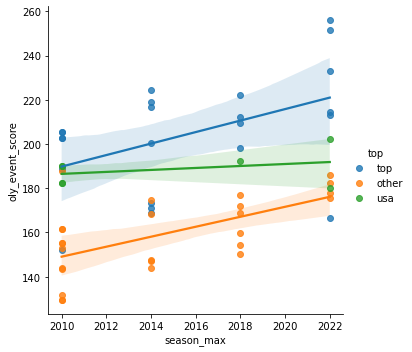

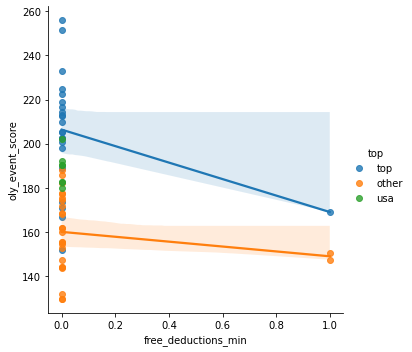

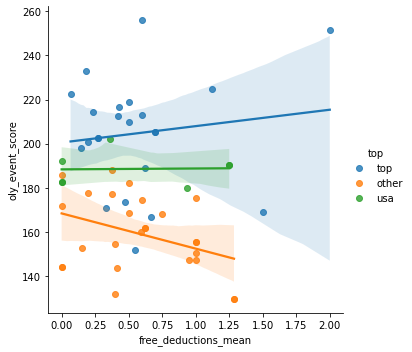

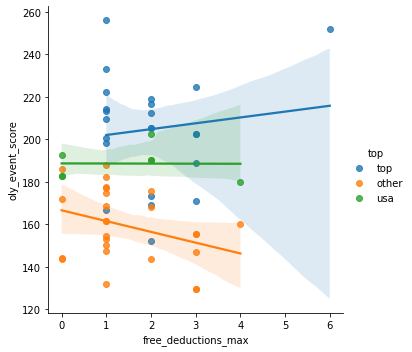

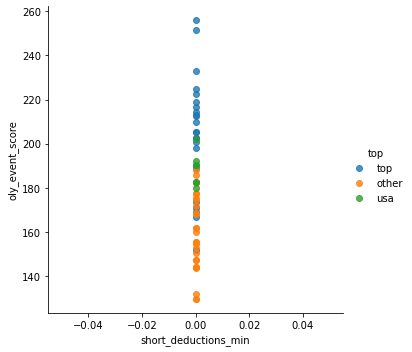

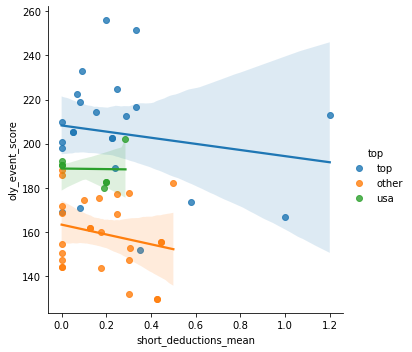

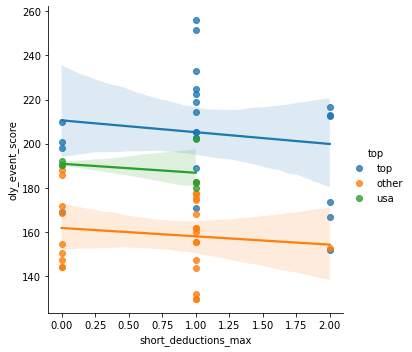

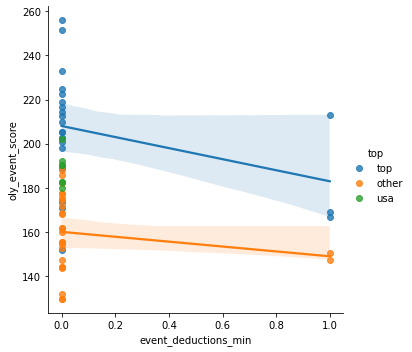

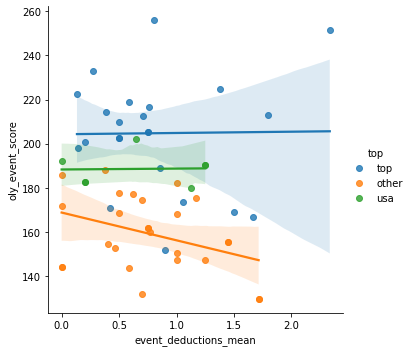

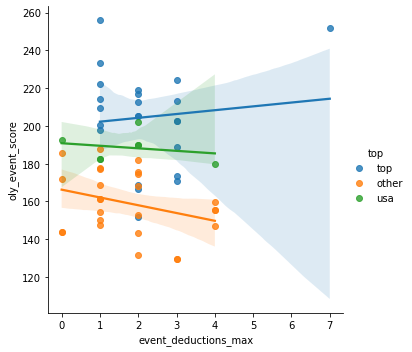

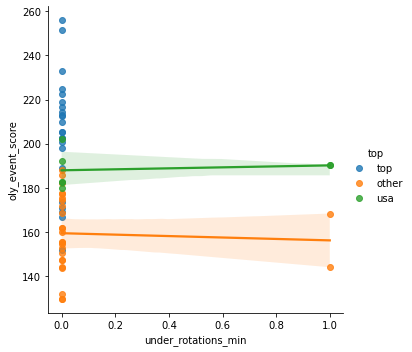

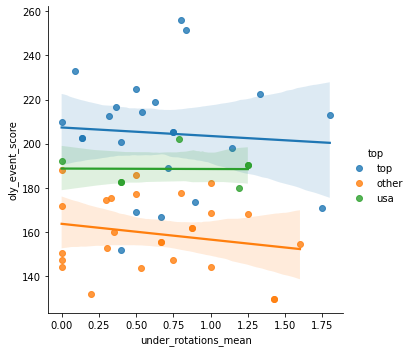

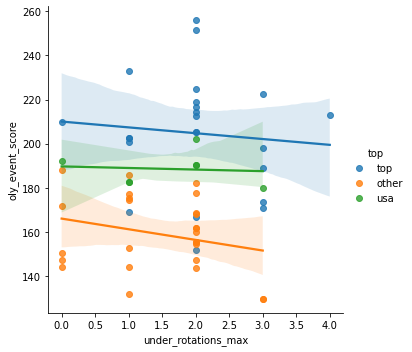

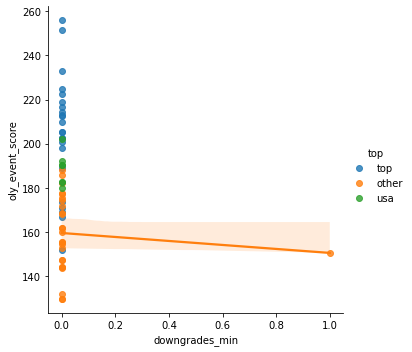

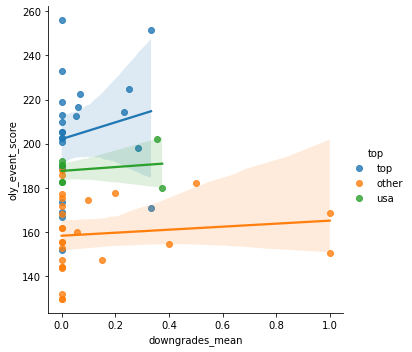

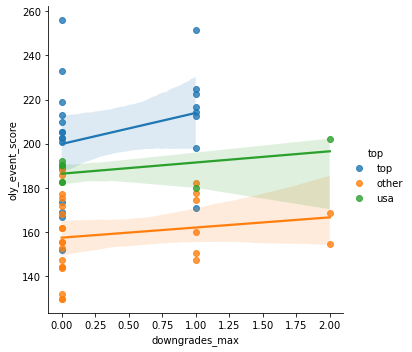

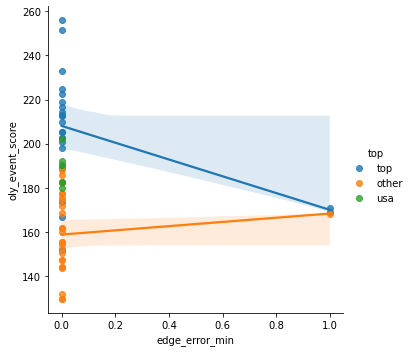

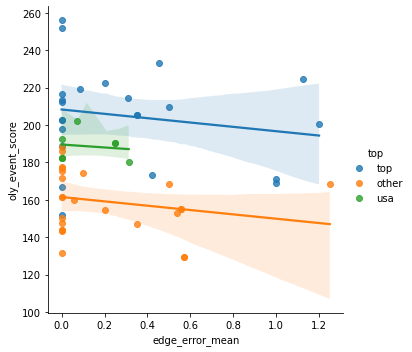

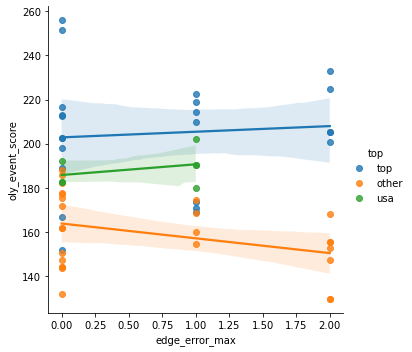

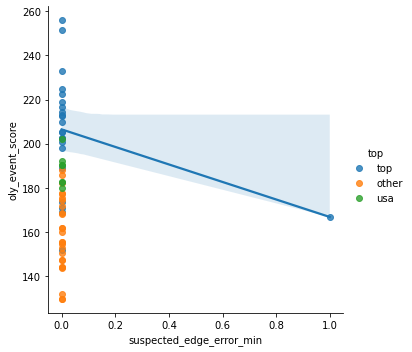

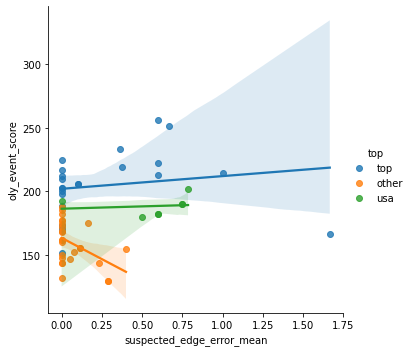

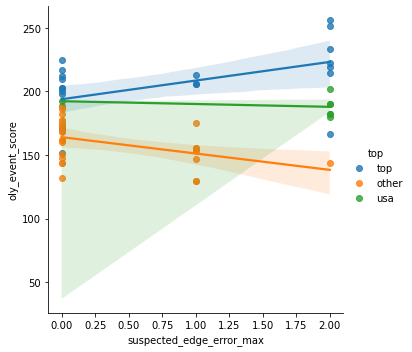

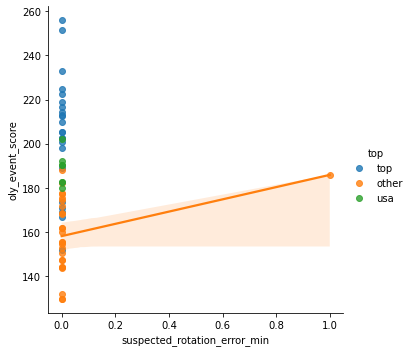

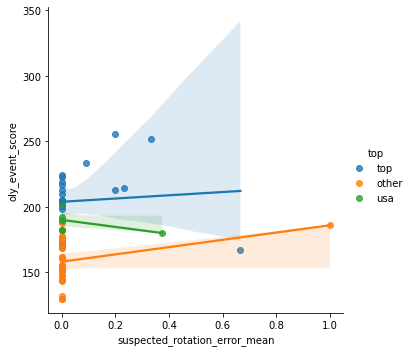

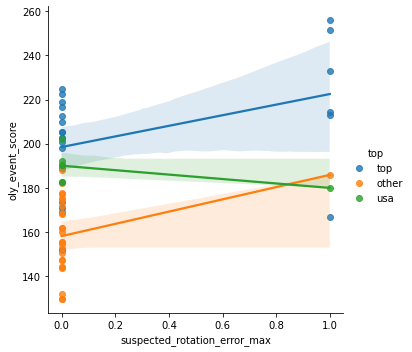

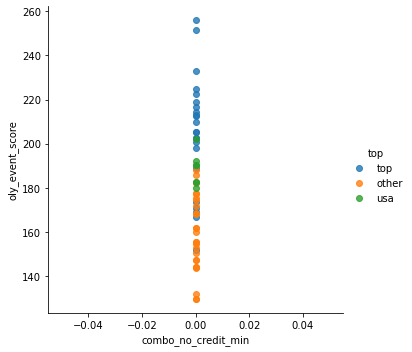

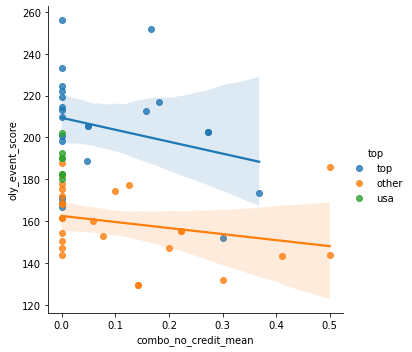

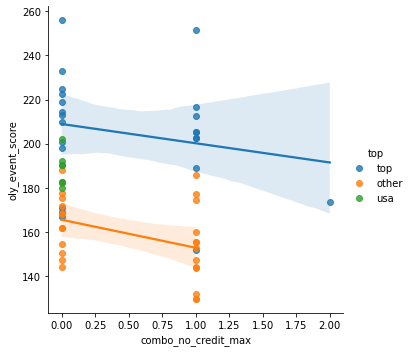

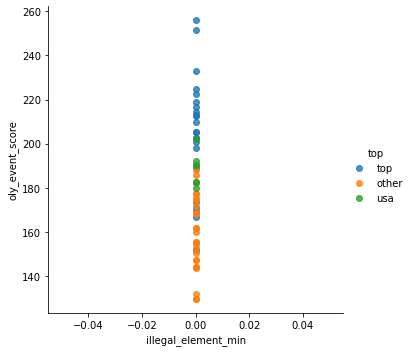

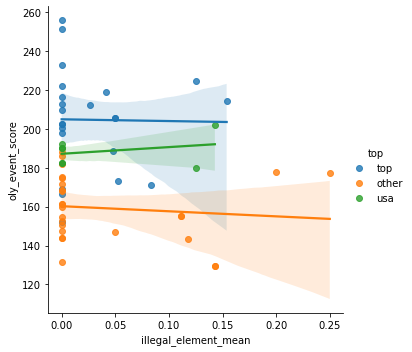

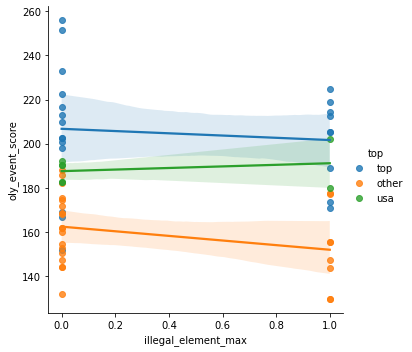

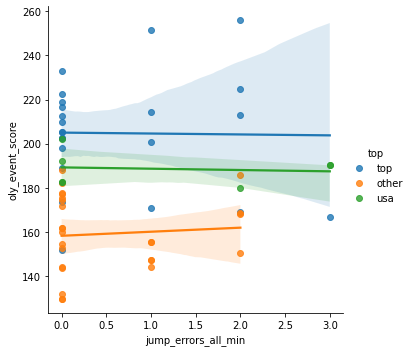

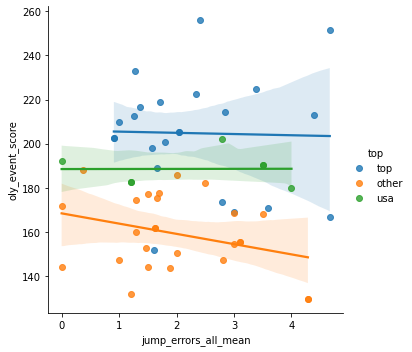

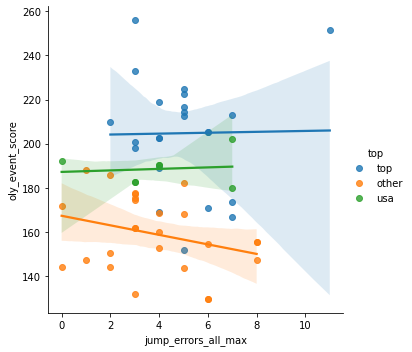

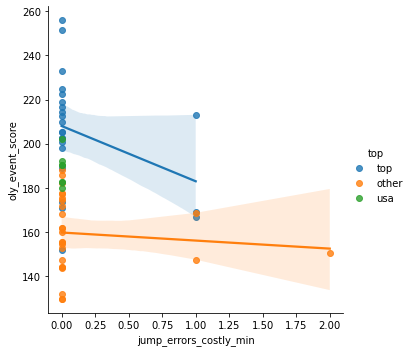

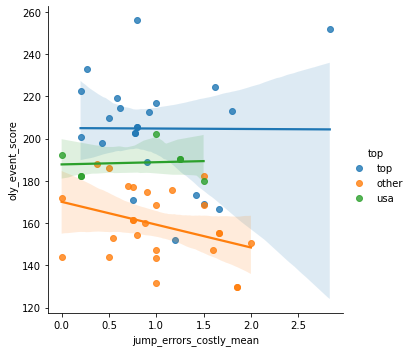

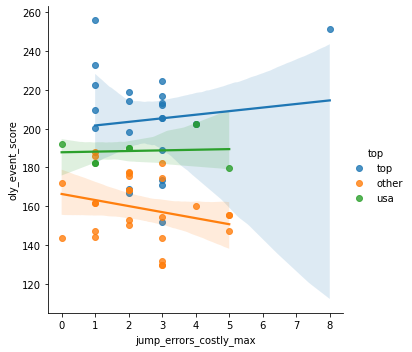

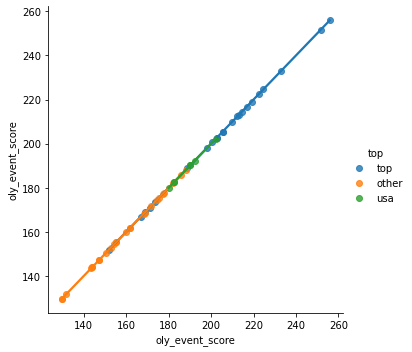

In [273]:
X1 = X_train.select_dtypes([np.int, np.float])
for i, col in enumerate(X1.columns):
    plt.figure(i)
    sns.lmplot(x=col, y='oly_event_score', data=train, hue='top')

In [322]:
train = train.reset_index()

In [323]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       56 non-null     int64  
 1   skater_name                 56 non-null     object 
 2   event_final_place           56 non-null     float64
 3   short_score                 56 non-null     float64
 4   free_score                  56 non-null     float64
 5   event_score                 56 non-null     float64
 6   short_elements_score        56 non-null     float64
 7   short_components_score      56 non-null     float64
 8   free_elements_score         56 non-null     float64
 9   free_components_score       56 non-null     float64
 10  season                      56 non-null     float64
 11  free_deductions             56 non-null     float64
 12  short_deductions            56 non-null     float64
 13  event_deductions            56 non-nu

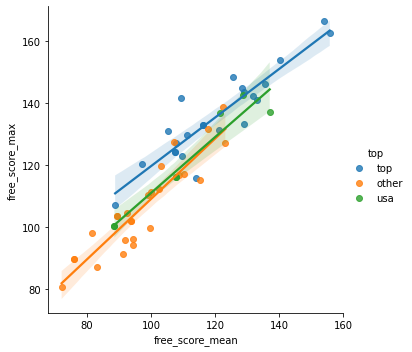

In [287]:
sns.lmplot(data=train, x='free_score_mean', y='free_score_max', hue='top')

In [321]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 9 to 16
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   skater_name                 56 non-null     object 
 1   event_final_place           56 non-null     float64
 2   short_score                 56 non-null     float64
 3   free_score                  56 non-null     float64
 4   event_score                 56 non-null     float64
 5   short_elements_score        56 non-null     float64
 6   short_components_score      56 non-null     float64
 7   free_elements_score         56 non-null     float64
 8   free_components_score       56 non-null     float64
 9   season                      56 non-null     float64
 10  free_deductions             56 non-null     float64
 11  short_deductions            56 non-null     float64
 12  event_deductions            56 non-null     float64
 13  under_rotations             56 non-nu

In [324]:
X_train = train.drop(columns=['skater_name', 'oly_event_final_place', 'oly_short_score', 'oly_short_elements_score',
                             'oly_short_components_score', 'oly_free_elements_score', 'oly_free_components_score',
                             'oly_free_score', 'oly_event_score', 'top', 'country'])
# creates dataframe that drops all column except the selected features for modeling
y_train = train[['oly_event_score']]
# creates dataframe of target variable (y) only

X_validate = validate.drop(columns=['skater_name', 'oly_event_final_place', 'oly_short_score', 'oly_short_elements_score',
                             'oly_short_components_score', 'oly_free_elements_score', 'oly_free_components_score',
                             'oly_free_score', 'oly_event_score','country'])
y_validate = validate[['oly_event_score']]
# repeat above for validate set

X_test = test.drop(columns=['skater_name', 'oly_event_final_place', 'oly_short_score', 'oly_short_elements_score',
                             'oly_short_components_score', 'oly_free_elements_score', 'oly_free_components_score',
                             'oly_free_score', 'oly_event_score','country'])
y_test = test[['oly_event_score']]

In [328]:
train.oly_event_score.mean()

181.53749999999997

In [327]:
y_train['pred_mean'] = y_train.oly_event_score.mean()
y_validate['pred_mean'] = y_validate.oly_event_score.mean()
# calculates mean prior to computing rmse

rmse_train = mean_squared_error(y_train.oly_event_score, y_train.pred_mean)**(1/2)
rmse_validate = mean_squared_error(y_validate.oly_event_score, y_validate.pred_mean)**(1/2)
# computes baseline RMSE for train and validate sets (square root of MSE)

print("Baseline RMSE\nTrain/In-Sample: ", round(rmse_train, 2)), 
print("Baseline RMSE\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

Baseline RMSE
Train/In-Sample:  29.37
Baseline RMSE
Validate/Out-of-Sample:  26.55


/var/folders/s4/hmz6ljm533vgpm_bhv59yw0m0000gn/T/ipykernel_81771/1930022914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train['pred_mean'] = y_train.oly_event_score.mean()
/var/folders/s4/hmz6ljm533vgpm_bhv59yw0m0000gn/T/ipykernel_81771/1930022914.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_validate['pred_mean'] = y_validate.oly_event_score.mean()


In [332]:
X_validate = X_validate.reset_index()

In [334]:
lm = LinearRegression(normalize=True)
# create the model

lm.fit(X_train, y_train.oly_event_score)
# fit the model to scaled training data

y_train['value_predict_lm'] = lm.predict(X_train)
# computes model predictions
rmse_train = mean_squared_error(y_train.oly_event_score, y_train.value_predict_lm)**(1/2)
# computes model rmse

y_validate['value_predict_lm'] = lm.predict(X_validate)
rmse_validate = mean_squared_error(y_validate.oly_event_score, y_validate.value_predict_lm)**(1/2)
# comutes predictions and rmse with validate data

print("**OLS Linear Regression Performance**")
print("---------------------------------------")
print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", round(rmse_train, 2))
print("---------------------------------------")
print("RMSE for OLS using LinearRegression\nValidation/Out-of-Sample: ", round(rmse_validate, 2))

**OLS Linear Regression Performance**
---------------------------------------
RMSE for OLS using LinearRegression
Training/In-Sample:  12.0
---------------------------------------
RMSE for OLS using LinearRegression
Validation/Out-of-Sample:  14.21


/var/folders/s4/hmz6ljm533vgpm_bhv59yw0m0000gn/T/ipykernel_81771/542473638.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train['value_predict_lm'] = lm.predict(X_train)
/var/folders/s4/hmz6ljm533vgpm_bhv59yw0m0000gn/T/ipykernel_81771/542473638.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_validate['value_predict_lm'] = lm.predict(X_validate)


In [335]:
lars = LassoLars(alpha=1.0)
# creates the model

lars.fit(X_train, y_train.oly_event_score)
# fit the model to scaled training data

y_train['pred_lars'] = lars.predict(X_train)
# computes model predictions
rmse_train = mean_squared_error(y_train.oly_event_score, y_train.pred_lars)**(1/2)
# computes model rmse

y_validate['pred_lars'] = lars.predict(X_validate)
rmse_validate = mean_squared_error(y_validate.oly_event_score, y_validate.pred_lars)**(1/2)
# comutes predictions and rmse with validate data

print("**LARS Performance**")
print("---------------------------------------")
print("RMSE for Lars\nTraining/In-Sample: ", round(rmse_train, 2))
print("---------------------------------------")
print("RMSE for Lars\nOut-of-Sample: ", round(rmse_validate, 2))

**LARS Performance**
---------------------------------------
RMSE for Lars
Training/In-Sample:  16.71
---------------------------------------
RMSE for Lars
Out-of-Sample:  16.16


/var/folders/s4/hmz6ljm533vgpm_bhv59yw0m0000gn/T/ipykernel_81771/3939064227.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train['pred_lars'] = lars.predict(X_train)
/var/folders/s4/hmz6ljm533vgpm_bhv59yw0m0000gn/T/ipykernel_81771/3939064227.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_validate['pred_lars'] = lars.predict(X_validate)


In [339]:
glm = TweedieRegressor(power= 2, alpha=8)
# creates the model

glm.fit(X_train, y_train.oly_event_score)
# fit the model to scaled training data

y_train['pred_value_glm'] = glm.predict(X_train)
# computes model predictions
rmse_train = mean_squared_error(y_train.oly_event_score, y_train.pred_value_glm)**(1/2)
# computes model rmse

y_validate['pred_value_glm'] = glm.predict(X_validate)
rmse_validate = mean_squared_error(y_validate.oly_event_score, y_validate.pred_value_glm)**(1/2)
# comutes predictions and rmse with validate data

print("**Generalized Linear Model Performance**")
print("---------------------------------------")
print("RMSE for GLM /In-Sample: ", round(rmse_train, 2)), 
print("---------------------------------------")
print("RMSE for GLM \nValidation/Out-of-Sample: ", round(rmse_validate, 2))

**Generalized Linear Model Performance**
---------------------------------------
RMSE for GLM /In-Sample:  14.49
---------------------------------------
RMSE for GLM 
Validation/Out-of-Sample:  13.39


/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/_loss/glm_distribution.py:246: RuntimeWarning: overflow encountered in power
  return np.power(y_pred, self.power)
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_glm/glm.py:287: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
/var/folders/s4/hmz6ljm533vgpm_bhv59yw0m0000gn/T/ipykernel_81771/3147708491.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train['pred_value_glm'] = glm.predict(X_train)
/var/folders/s4/hmz6

ValueError: cannot reindex from a duplicate axis

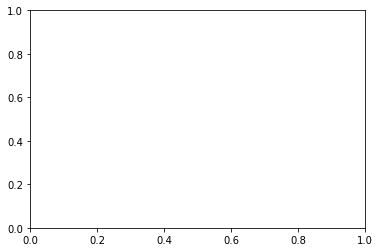

In [275]:
### distributions of features

sns.kdeplot(train.free_score_mean[train.top == "top"],label='top');
sns.kdeplot(train.free_score_mean[train.top == "usa"],label='usa');
sns.kdeplot(train.free_score_mean[train.top == "other"],label='other');
